### Testing another dataset
https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics


In [10]:
df = pd.read_csv('WELFake_Dataset.csv')

# Check number of NaN values
print("Number of NaN values in text column:", df['text'].isna().sum())

# Remove rows with NaN values
df = df.dropna(subset=['text'])

# Convert text column to string type to ensure compatibility
df['text'] = df['text'].astype(str)

print("Shape of dataset after cleaning:", df.shape)

Number of NaN values in text column: 39
Shape of dataset after cleaning: (72095, 4)


In [11]:
v = TfidfVectorizer()
X = v.fit_transform(df['text'])
y = df['label'].to_numpy()

In [19]:
clf = LogisticRegression(max_iter=200)
clf.fit(X, y)
y_pred = clf.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y, y_pred))


Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     35028
           1       0.96      0.97      0.96     37067

    accuracy                           0.96     72095
   macro avg       0.96      0.96      0.96     72095
weighted avg       0.96      0.96      0.96     72095



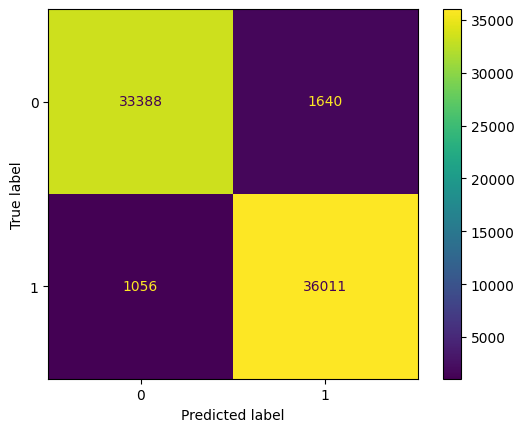

In [18]:
import matplotlib.pyplot as plt

conf_mat = metrics.confusion_matrix(y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [0, 1])

cm_display.plot()
plt.show()
